# 01: Exploratory Data Analysis (EDA)
Project Statistika Inferensi TIF-SI-B 2024 Kelompok 8.

Anggota:
1. Ahmad Zaki
2. Arion Syemael Siahaan
3. Rayhan Egar Sadtya Nugraha

## Data Read

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import kstest, shapiro, anderson

In [111]:
df = pd.read_csv('../data/SI-B Dataset 3 Project.csv')
df.head()

Image Name      meanR      meanG     meanB       stdR       stdG  \
0    ijo2pa1.jpg  17.395776  18.057278  4.548844  40.818315  42.747400   
1   ijo2pa10.jpg  17.048930  17.143965  4.285857  41.389466  42.116279   
2  ijo2pa100.jpg  19.957301  16.498584  5.082156  48.724795  40.816921   
3  ijo2pa101.jpg  19.713066  18.029258  4.707696  47.484912  43.629222   
4  ijo2pa102.jpg  17.383914  14.581238  4.632718  46.006665  38.900382   

        stdB     skewR     skewG     skewB  ...  ASM-1-90  dissimilarity-1-90  \
0  15.235375  2.080558  2.117612  4.194824  ...  0.011467            1.442313   
1  14.243516  2.185737  2.233318  4.195780  ...  0.008959            1.323746   
2  15.203335  2.169338  2.245723  3.863509  ...  0.009252            1.107091   
3  14.230307  2.135099  2.147982  3.987222  ...  0.008969            1.050541   
4  14.446719  2.417031  2.458251  3.903999  ...  0.009931            0.977596   

   contrast-1-135  energy-1-135  homogeneity-1-135  correlation-1-135  \
0       25.495182      0.094406           0.596762           0.993697   
1       19.458658      0.083524           0.601338           0.994707   
2       19.837377      0.084084           0.603311           0.994233   
3       17.983701      0.082048           0.596238           0.994426   
4       13.670599      0.087442           0.621051           0.994895   

   ASM-1-135  dissimilarity-1-135  class  Class  
0   0.008912             1.723876     11      1  
1   0.006976             1.618708     11      1  
2   0.007070             1.425450     11      1  
3   0.006732             1.375565     11      1  
4   0.007646             1.252951     11      1  

[5 rows x 81 columns]

In [112]:
numeric_feats = df.select_dtypes(include=['float64', 'int64'])
numeric_feats.drop(columns=['class', 'Class'], inplace=True)
numeric_feats

meanR      meanG     meanB       stdR       stdG       stdB  \
0     17.395776  18.057278  4.548844  40.818315  42.747400  15.235375   
1     17.048930  17.143965  4.285857  41.389466  42.116279  14.243516   
2     19.957301  16.498584  5.082156  48.724795  40.816921  15.203335   
3     19.713066  18.029258  4.707696  47.484912  43.629222  14.230307   
4     17.383914  14.581238  4.632718  46.006665  38.900382  14.446719   
...         ...        ...       ...        ...        ...        ...   
5651   9.639953  10.066067  3.723893  30.483106  31.889883  13.215059   
5652  13.668622  14.771024  4.213619  36.393775  38.963387  14.905458   
5653   8.400466   8.839484  3.206222  26.736850  28.164536  11.817830   
5654   6.854176   7.180244  2.669827  23.889681  25.155812  10.683938   
5655  14.702825  15.633670  4.717498  37.707117  40.000770  15.451875   

         skewR     skewG     skewB      kurR  ...  homogeneity-1-90  \
0     2.080558  2.117612  4.194824  2.786645  ...          0.661221   
1     2.185737  2.233318  4.195780  3.243245  ...          0.668268   
2     2.169338  2.245723  3.863509  3.069086  ...          0.677613   
3     2.135099  2.147982  3.987222  2.920590  ...          0.678148   
4     2.417031  2.458251  3.903999  4.259136  ...          0.694110   
...        ...       ...       ...       ...  ...               ...   
5651  2.992953  2.998821  4.248670  7.465886  ...          0.731947   
5652  2.582813  2.486990  4.489599  5.639969  ...          0.762744   
5653  3.006128  2.996293  4.830452  7.515368  ...          0.724399   
5654  3.349365  3.382105  5.157558  9.783128  ...          0.678691   
5655  2.359625  2.314493  4.277625  4.170651  ...          0.716232   

      correlation-1-90  ASM-1-90  dissimilarity-1-90  contrast-1-135  \
0             0.994862  0.011467            1.442313       25.495182   
1             0.995726  0.008959            1.323746       19.458658   
2             0.996042  0.009252            1.107091       19.837377   
3             0.996255  0.008969            1.050541       17.983701   
4             0.996391  0.009931            0.977596       13.670599   
...                ...       ...                 ...             ...   
5651          0.996868  0.011226            0.725780        7.150027   
5652          0.998743  0.012265            0.689985        6.195821   
5653          0.997622  0.011560            0.810050        8.340865   
5654          0.995737  0.009698            0.917355        8.882472   
5655          0.998023  0.011949            0.833826        8.839826   

      energy-1-135  homogeneity-1-135  correlation-1-135  ASM-1-135  \
0         0.094406           0.596762           0.993697   0.008912   
1         0.083524           0.601338           0.994707   0.006976   
2         0.084084           0.603311           0.994233   0.007070   
3         0.082048           0.596238           0.994426   0.006732   
4         0.087442           0.621051           0.994895   0.007646   
...            ...                ...                ...        ...   
5651      0.092747           0.656495           0.995965   0.008602   
5652      0.099329           0.710111           0.998233   0.009866   
5653      0.092990           0.640558           0.996755   0.008647   
5654      0.086371           0.599516           0.994767   0.007460   
5655      0.095925           0.648261           0.997388   0.009202   

      dissimilarity-1-135  
0                1.723876  
1                1.618708  
2                1.425450  
3                1.375565  
4                1.252951  
...                   ...  
5651             0.936422  
5652             0.839363  
5653             1.070910  
5654             1.164045  
5655             1.049950  

[5656 rows x 78 columns]

In [113]:
nonnumeric_feats = df.select_dtypes(include=['object'])
nonnumeric_feats

Image Name
0       ijo2pa1.jpg
1      ijo2pa10.jpg
2     ijo2pa100.jpg
3     ijo2pa101.jpg
4     ijo2pa102.jpg
...             ...
5651   morotk79.jpg
5652    morotk8.jpg
5653   morotk80.jpg
5654   morotk81.jpg
5655    morotk9.jpg

[5656 rows x 1 columns]

In [114]:
df_target = df['Class'].copy()
df_data = df.drop(columns=['class', 'Class', 'correlation-1-0'], axis=1).copy()

In [115]:
df_data.shape

(5656, 78)

## Train test split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=.2, random_state=42)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [117]:
id_train = X_train['Image Name'].copy()
X_train.drop(columns=['Image Name'], inplace=True)

id_test = X_test['Image Name'].copy()
X_test.drop(columns=['Image Name'], inplace=True)

### Note
- Untuk data training dan target training, masing-masing menggunakan: X_train dan y_train
- Untuk data testing dan target testing, masing-masing menggunakan: X_test dan y_test
- Identifier untuk training dan testing, masing-masing menggunakan: id_train dan id_test

## Data Distribution

### Target Variable

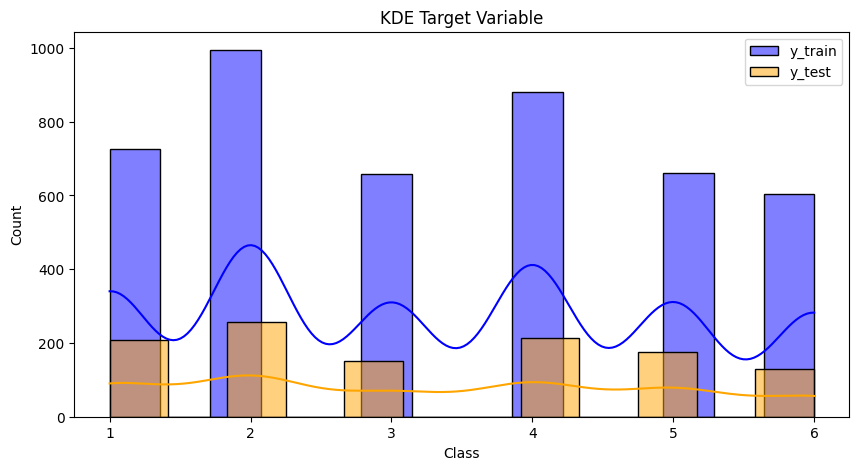

In [118]:
plt.figure(figsize=(10, 5))
sns.histplot(y_train, x='Class', label='y_train', kde=True, color='blue', alpha=0.5) 
sns.histplot(y_test, x='Class', label='y_test', kde=True, color='orange', alpha=0.5) 

plt.title('KDE Target Variable')
plt.legend()
plt.show()

### Feature Variable

In [119]:
print(1 if X_train.shape[1]==X_test.shape[1] else 0)

1


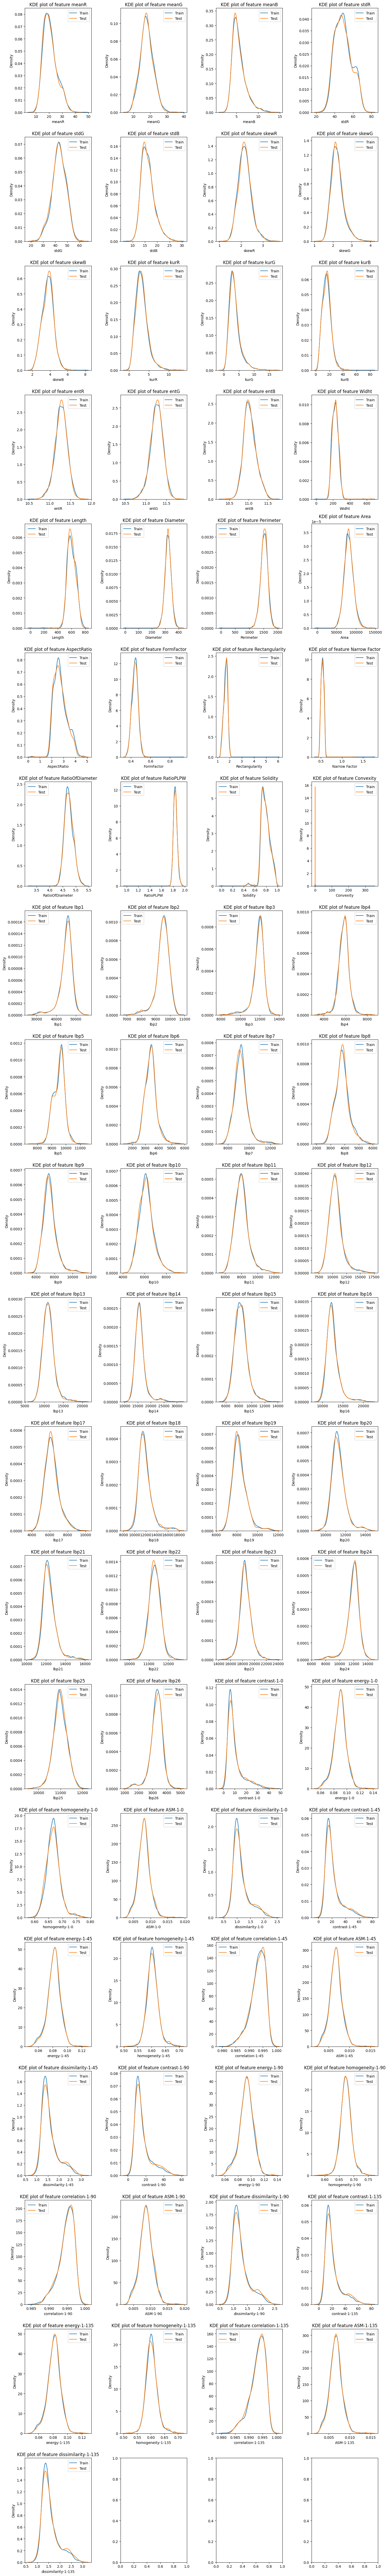

In [120]:
num_cols = 4
num_rows = len(X_train.columns) // num_cols + (len(X_train.columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, feature in enumerate(X_train.columns):
    sns.kdeplot(X_train[feature], label='Train', ax=axes[i])
    sns.kdeplot(X_test[feature], label='Test', ax=axes[i])
    axes[i].set_title(f'KDE plot of feature {feature}')
    axes[i].legend()

plt.tight_layout()
plt.show()

## Data Normality

### Assess Skewness and Kurtosis

In [121]:
from scipy.stats import skew, kurtosis

skew_kurtosis_results = {
    'Feature': [],
    'Skew': [],
    'Kurtosis': []
}

for feature in X_train.columns:
    skew_value = skew(X_train[feature])
    kurtosis_value = kurtosis(X_train[feature])

    skew_kurtosis_results['Feature'].append(feature)
    skew_kurtosis_results['Skew'].append(skew_value)
    skew_kurtosis_results['Kurtosis'].append(kurtosis_value)

skew_kurtosis_df = pd.DataFrame(skew_kurtosis_results)
skew_kurtosis_df

Feature      Skew  Kurtosis
0                 meanR  0.626588  0.078320
1                 meanG  0.198008  0.123010
2                 meanB  1.291117  2.297441
3                  stdR  0.301875 -0.615722
4                  stdG -0.242227  0.029675
..                  ...       ...       ...
72         energy-1-135 -0.237864  0.549756
73    homogeneity-1-135  0.624264  1.946222
74    correlation-1-135 -0.960483  0.825887
75            ASM-1-135  0.188446  0.690410
76  dissimilarity-1-135  1.298978  1.448763

[77 rows x 3 columns]

In [122]:
skew_kurtosis_df['Skew'].describe()

count    77.000000
mean      1.110678
std       5.514544
min      -4.041650
25%      -0.213892
50%       0.499697
75%       1.161419
max      46.497255
Name: Skew, dtype: float64

In [123]:
skew_kurtosis_df['Kurtosis'].describe()

count      77.000000
mean       38.107109
std       265.476134
min        -0.615722
25%         0.706968
50%         1.632316
75%         3.385126
max      2320.609475
Name: Kurtosis, dtype: float64

### Saphiro-Wilk test

In [139]:
from scipy.stats import shapiro
import pandas as pd

shapiro_test_results = {
    'Feature': [],
    'Statistic': [],
    'P-Value': [],
    'Normality': []
}

alpha = 0.05

for feature in X_train.columns:

    statistic, p_value = shapiro(X_train[feature])

    shapiro_test_results['Feature'].append(feature)
    shapiro_test_results['Statistic'].append(statistic)
    shapiro_test_results['P-Value'].append(p_value)

    if p_value < alpha:
        shapiro_test_results['Normality'].append('Not Normal')
    else:
        shapiro_test_results['Normality'].append('Potentially Normal')

shapiro_test_df = pd.DataFrame(shapiro_test_results)
shapiro_test_df

Feature  Statistic       P-Value   Normality
0                 meanR   0.970889  2.245860e-29  Not Normal
1                 meanG   0.997077  1.111498e-07  Not Normal
2                 meanB   0.916384  1.546148e-44  Not Normal
3                  stdR   0.981409  6.324421e-24  Not Normal
4                  stdG   0.995531  1.586152e-10  Not Normal
..                  ...        ...           ...         ...
72         energy-1-135   0.991568  9.282738e-16  Not Normal
73    homogeneity-1-135   0.973057  2.159442e-28  Not Normal
74    correlation-1-135   0.942069  6.849875e-39  Not Normal
75            ASM-1-135   0.993322  1.065190e-13  Not Normal
76  dissimilarity-1-135   0.888533  3.073716e-49  Not Normal

[77 rows x 4 columns]

In [125]:
shapiro_test_df['Normality'].value_counts()

Normality
Not Normal    77
Name: count, dtype: int64

In [126]:
shapiro_test_df['P-Value'].describe()

count    7.700000e+01
mean     1.464389e-09
std      1.266475e-08
min      5.528652e-93
25%      1.546148e-44
50%      7.579339e-35
75%      7.807266e-21
max      1.111498e-07
Name: P-Value, dtype: float64

### Kolmorogov-Smirnov Test
With respect to each feature's mean and std

In [127]:
from scipy.stats import kstest, norm
import pandas as pd

ks_test_results = {
    'Feature': [],
    'Statistic': [],
    'P-Value': [],
    'Normality': []
}

for feature in X_train.columns:

    feature_mean = X_train[feature].mean()
    feature_std = X_train[feature].std()
    
    statistic, p_value = kstest(X_train[feature], 'norm', args=(feature_mean, feature_std))

    ks_test_results['Feature'].append(feature)
    ks_test_results['Statistic'].append(statistic)
    ks_test_results['P-Value'].append(p_value)

    alpha = 0.05
    if p_value < alpha:
        ks_test_results['Normality'].append('Not Normal')
    else:
        ks_test_results['Normality'].append('Potentially Normal')

ks_test_df = pd.DataFrame(ks_test_results)


In [128]:
ks_test_df['Normality'].value_counts()

Normality
Not Normal            74
Potentially Normal     3
Name: count, dtype: int64

In [129]:
ks_test_df['P-Value'].describe()

count    7.700000e+01
mean     7.250726e-03
std      3.149520e-02
min      0.000000e+00
25%      1.402479e-27
50%      1.463506e-10
75%      1.312301e-05
max      1.955287e-01
Name: P-Value, dtype: float64

## Data Transformation
Uses Yeo-Johnson transformation. Kak Dzaki said so, plus it can helps mitigate the effect of extreme tail/kurtosis and skewness.

In [130]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer

X_train_transformed = {}
X_test_transformed = {}

for feature in X_train.columns:
    try:
        pt = PowerTransformer(method='yeo-johnson', standardize=True)
        
        X_train_transformed[feature] = pt.fit_transform(X_train[[feature]]).flatten()
        X_test_transformed[feature] = pt.transform(X_test[[feature]]).flatten()
        
    except Exception as e:
        print(f"Could not transform {feature}: {e}")

X_train_transformed = pd.DataFrame(X_train_transformed, index=X_train.index)
X_test_transformed = pd.DataFrame(X_test_transformed, index=X_test.index)

/home/sobaqov/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/sobaqov/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/sobaqov/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [131]:
X_train_transformed.columns

Index(['meanR', 'meanG', 'meanB', 'stdR', 'stdG', 'stdB', 'skewR', 'skewG',
       'skewB', 'kurR', 'kurG', 'kurB', 'entR', 'entG', 'entB', 'Widht',
       'Length', 'Diameter', 'Perimeter', 'Area', 'AspectRatio', 'FormFactor',
       'Rectangularity', 'Narrow Factor', 'RatioOfDiameter', 'RatioPLPW',
       'Solidity', 'Convexity', 'lbp1', 'lbp2', 'lbp3', 'lbp4', 'lbp5', 'lbp6',
       'lbp7', 'lbp8', 'lbp9', 'lbp10', 'lbp11', 'lbp12', 'lbp13', 'lbp14',
       'lbp15', 'lbp16', 'lbp17', 'lbp18', 'lbp19', 'lbp20', 'lbp21', 'lbp22',
       'lbp23', 'lbp24', 'lbp25', 'lbp26', 'contrast-1-0', 'energy-1-0',
       'homogeneity-1-0', 'ASM-1-0', 'dissimilarity-1-0', 'contrast-1-45',
       'energy-1-45', 'homogeneity-1-45', 'correlation-1-45', 'ASM-1-45',
       'dissimilarity-1-45', 'contrast-1-90', 'energy-1-90',
       'homogeneity-1-90', 'correlation-1-90', 'ASM-1-90',
       'dissimilarity-1-90', 'contrast-1-135', 'energy-1-135',
       'homogeneity-1-135', 'correlation-1-135', 'ASM-1-13

## Post-Data Transformation

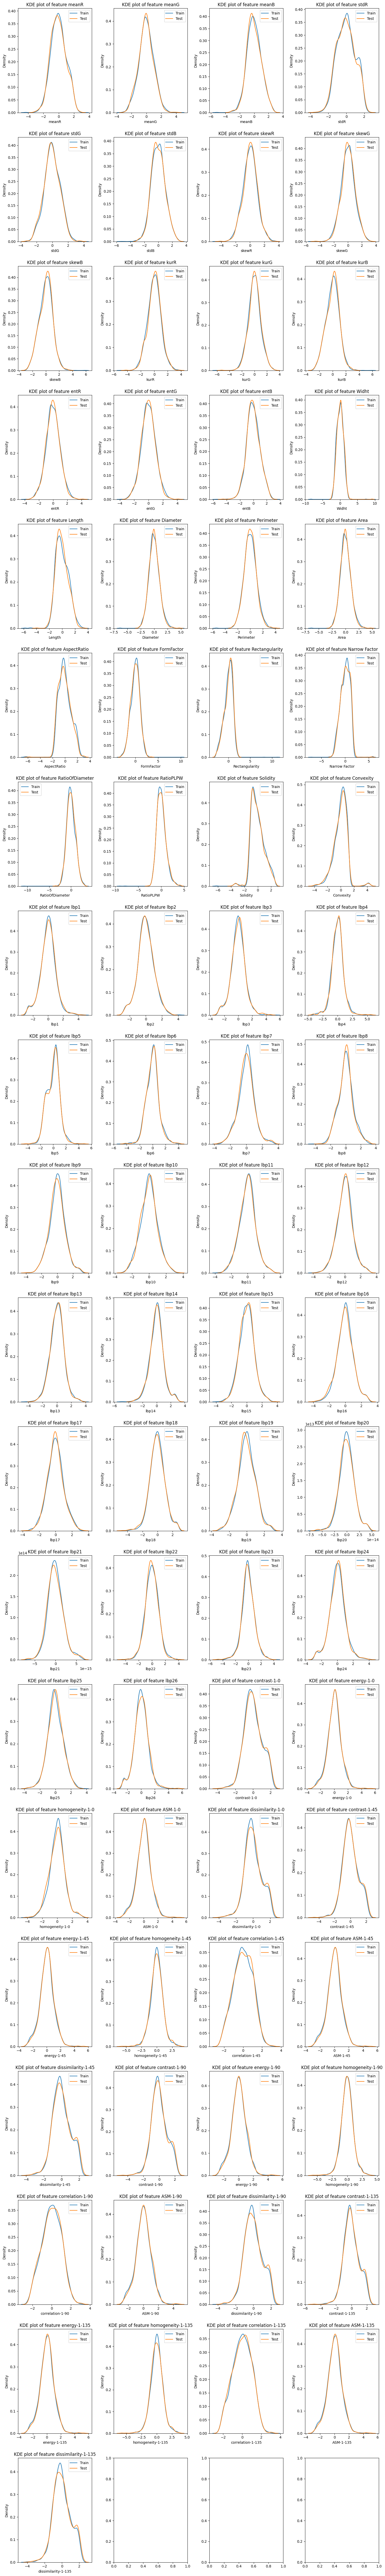

In [138]:
num_cols = 4
num_rows = len(X_train_transformed.columns) // num_cols + (len(X_train_transformed.columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, feature in enumerate(X_train_transformed.columns):
    sns.kdeplot(X_train_transformed[feature], label='Train', ax=axes[i])
    sns.kdeplot(X_test_transformed[feature], label='Test', ax=axes[i])
    axes[i].set_title(f'KDE plot of feature {feature}')
    axes[i].legend()

plt.tight_layout()
plt.show()

### Recheck Skew and Kurtosis

In [132]:
skew_kurtosis_results_after = {
    'Feature': [],
    'Skew': [],
    'Kurtosis': []
}

for feature in X_train_transformed.columns:
    skew_value = skew(X_train_transformed[feature])
    kurtosis_value = kurtosis(X_train_transformed[feature])

    skew_kurtosis_results_after['Feature'].append(feature)
    skew_kurtosis_results_after['Skew'].append(skew_value)
    skew_kurtosis_results_after['Kurtosis'].append(kurtosis_value)

skew_kurtosis_after_df = pd.DataFrame(skew_kurtosis_results_after)
skew_kurtosis_after_df

Feature      Skew  Kurtosis
0                 meanR  0.001079 -0.227533
1                 meanG  0.001815  0.059269
2                 meanB -0.005668  0.231935
3                  stdR -0.005410 -0.594571
4                  stdG -0.009422 -0.111099
..                  ...       ...       ...
72         energy-1-135  0.013690  0.599979
73    homogeneity-1-135 -0.048545  1.247328
74    correlation-1-135 -0.074936 -0.506479
75            ASM-1-135 -0.008452  0.481669
76  dissimilarity-1-135  0.034462  0.058861

[77 rows x 3 columns]

In [133]:
skew_kurtosis_comparison_df = pd.DataFrame(
    {
        'Feature' : X_train_transformed.columns,
        'Skew Before': skew_kurtosis_df['Skew'],
        'Skew After': skew_kurtosis_after_df['Skew'],
        'Kurtosis Before': skew_kurtosis_df['Kurtosis'],
        'Kurtosis After': skew_kurtosis_after_df['Kurtosis'],
        'Delta Skew': abs(skew_kurtosis_df['Skew'] - skew_kurtosis_after_df['Skew']),
        'Delta Kurtosis': abs(skew_kurtosis_df['Kurtosis'] - skew_kurtosis_after_df['Kurtosis'])
    }
)

In [134]:
skew_kurtosis_comparison_df

Feature  Skew Before  Skew After  Kurtosis Before  \
0                 meanR     0.626588    0.001079         0.078320   
1                 meanG     0.198008    0.001815         0.123010   
2                 meanB     1.291117   -0.005668         2.297441   
3                  stdR     0.301875   -0.005410        -0.615722   
4                  stdG    -0.242227   -0.009422         0.029675   
..                  ...          ...         ...              ...   
72         energy-1-135    -0.237864    0.013690         0.549756   
73    homogeneity-1-135     0.624264   -0.048545         1.946222   
74    correlation-1-135    -0.960483   -0.074936         0.825887   
75            ASM-1-135     0.188446   -0.008452         0.690410   
76  dissimilarity-1-135     1.298978    0.034462         1.448763   

    Kurtosis After  Delta Skew  Delta Kurtosis  
0        -0.227533    0.625508        0.305853  
1         0.059269    0.196193        0.063741  
2         0.231935    1.296785        2.065507  
3        -0.594571    0.307285        0.021151  
4        -0.111099    0.232805        0.140773  
..             ...         ...             ...  
72        0.599979    0.251554        0.050223  
73        1.247328    0.672809        0.698894  
74       -0.506479    0.885547        1.332365  
75        0.481669    0.196898        0.208741  
76        0.058861    1.264515        1.389902  

[77 rows x 7 columns]

In [136]:
skew_kurtosis_comparison_df['Delta Skew'].describe()

count    77.000000
mean      1.642204
std       5.386111
min       0.010710
25%       0.323196
50%       0.854664
75%       1.264515
max      46.484522
Name: Delta Skew, dtype: float64

In [137]:
skew_kurtosis_comparison_df['Delta Kurtosis'].describe()

count      77.000000
mean       37.378273
std       265.126910
min         0.001993
25%         0.208741
50%         1.389902
75%         2.744832
max      2317.175298
Name: Delta Kurtosis, dtype: float64

### Shapiro-Wilk Test

In [140]:
from scipy.stats import shapiro
import pandas as pd

shapiro_test_after_results = {
    'Feature': [],
    'Statistic': [],
    'P-Value': [],
    'Normality': []
}

alpha = 0.05

for feature in X_train_transformed.columns:

    statistic, p_value = shapiro(X_train_transformed[feature])

    shapiro_test_after_results['Feature'].append(feature)
    shapiro_test_after_results['Statistic'].append(statistic)
    shapiro_test_after_results['P-Value'].append(p_value)

    if p_value < alpha:
        shapiro_test_after_results['Normality'].append('Not Normal')
    else:
        shapiro_test_after_results['Normality'].append('Potentially Normal')

shapiro_test_after_df = pd.DataFrame(shapiro_test_after_results)
shapiro_test_after_df

Feature  Statistic       P-Value   Normality
0                 meanR   0.996408  5.369673e-09  Not Normal
1                 meanG   0.999148  2.524422e-02  Not Normal
2                 meanB   0.996926  5.453212e-08  Not Normal
3                  stdR   0.989929  1.964460e-17  Not Normal
4                  stdG   0.998789  2.019181e-03  Not Normal
..                  ...        ...           ...         ...
72         energy-1-135   0.994321  2.311202e-12  Not Normal
73    homogeneity-1-135   0.989413  6.384211e-18  Not Normal
74    correlation-1-135   0.993800  4.461921e-13  Not Normal
75            ASM-1-135   0.995185  4.441767e-11  Not Normal
76  dissimilarity-1-135   0.987168  7.227164e-20  Not Normal

[77 rows x 4 columns]

In [141]:
shapiro_test_after_df['Normality'].value_counts()

Normality
Not Normal    77
Name: count, dtype: int64

### Kolmogorov-Smirnov Test
With respect to feature's mean and std

In [142]:
ks_test_after_results = {
    'Feature': [],
    'Statistic': [],
    'P-Value': [],
    'Normality': []
}

for feature in X_train_transformed.columns:

    feature_mean = X_train_transformed[feature].mean()
    feature_std = X_train_transformed[feature].std()
    
    statistic, p_value = kstest(X_train_transformed[feature], 'norm', args=(feature_mean, feature_std))

    ks_test_after_results['Feature'].append(feature)
    ks_test_after_results['Statistic'].append(statistic)
    ks_test_after_results['P-Value'].append(p_value)

    alpha = 0.05
    if p_value < alpha:
        ks_test_after_results['Normality'].append('Not Normal')
    else:
        ks_test_after_results['Normality'].append('Potentially Normal')

ks_test_after_df = pd.DataFrame(ks_test_after_results)

In [143]:
ks_test_after_df['Normality'].value_counts()

Normality
Not Normal            64
Potentially Normal    13
Name: count, dtype: int64

### KDE Before and After Transformation

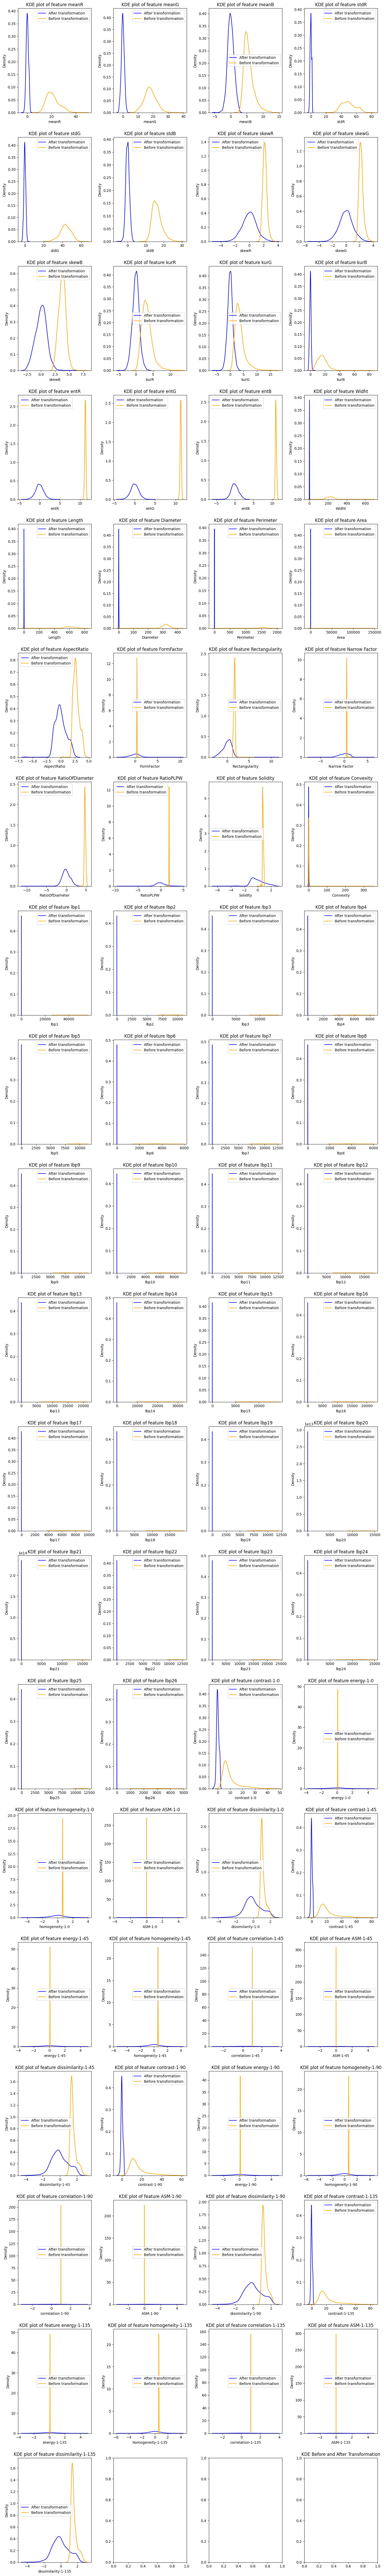

In [144]:
num_cols = 4
num_rows = len(X_train_transformed.columns) // num_cols + (len(X_train_transformed.columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, feature in enumerate(X_train_transformed.columns):
    sns.kdeplot(X_train_transformed[feature], label='After transformation', color='blue', ax=axes[i])
    sns.kdeplot(X_train[feature], label='Before transformation', color='orange', ax=axes[i])
    axes[i].set_title(f'KDE plot of feature {feature}')
    axes[i].legend()

plt.title('KDE Before and After Transformation')
plt.tight_layout()
plt.show()